In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline

In [2]:
data  = pd.read_csv("Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#data = data.dropna(axis=1, inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data = data.drop(['Age', 'Cabin', 'Embarked', 'PassengerId', 'Name', 'Sex', 'Ticket'], axis=1)
data.head()

,Survived,Pclass,SibSp,Parch,Fare
0,0,3,1,0,7.2500
1,1,1,1,0,71.2833
2,1,3,0,0,7.9250
3,1,1,1,0,53.1000
4,0,3,0,0,8.0500


In [5]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [7]:
#Spliting The Dataset into Training & Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU
from tensorflow.keras.layers import Dropout

In [16]:
model = Sequential()
model.add(Dense(input_dim=4, units=8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(input_dim=4, units=4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation='sigmoid'))
model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_history = model.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
48/48 [==============================] - 1s 12ms/step - loss: 0.7655 - accuracy: 0.4353 - val_loss: 0.7287 - val_accuracy: 0.5702
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.6193 - val_loss: 0.6981 - val_accuracy: 0.5617
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.6151 - val_loss: 0.6820 - val_accuracy: 0.5915
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6111 - val_loss: 0.6733 - val_accuracy: 0.5957
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6666 - val_loss: 0.6687 - val_accuracy: 0.6085
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.6822 - val_loss: 0.6655 - val_accuracy: 0.6085
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6476 - val_loss: 0.6638 - val_accuracy: 0.6085
Epoch 8/100


Epoch 59/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.7056 - val_loss: 0.6238 - val_accuracy: 0.6681
Epoch 60/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.6961 - val_loss: 0.6229 - val_accuracy: 0.6638
Epoch 61/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.7005 - val_loss: 0.6218 - val_accuracy: 0.6638
Epoch 62/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.6804 - val_loss: 0.6219 - val_accuracy: 0.6681
Epoch 63/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.7191 - val_loss: 0.6218 - val_accuracy: 0.6681
Epoch 64/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.7439 - val_loss: 0.6217 - val_accuracy: 0.6681
Epoch 65/100
48/48 [==============================] - 0s 1ms/step - loss: 0.5605 - accuracy: 0.7217 - val_loss: 0.6211 - val_accuracy: 0.6681
Epoch 

In [22]:
y_pred = model.predict(X_test)
y_pred = (y_pred >0.5)

In [23]:
y_pred

array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [24]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[99, 11],
       [39, 30]], dtype=int64)

In [26]:
history_dict = model_history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

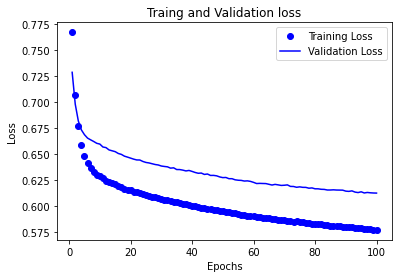

In [28]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict["val_loss"]


epochs = range(1, len(acc) +1)


plt.plot(epochs, loss, 'bo', label="Training Loss")       # 'bo' is for "blue dot"
plt.plot(epochs, val_loss, 'b', label="Validation Loss")  # 'b' is for  "solid blue line"

plt.title("Traing and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

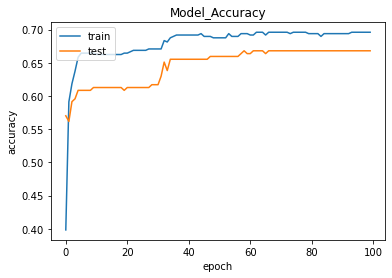

In [29]:
#Summerize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="upper left")
plt.show()

In [34]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [35]:
def build_classifier():
    model = Sequential()
    model.add(Dense(input_dim=4, units=8, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(input_dim=4, units=4, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [36]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size=100, epochs=15)
accuiracy = cross_val_score(estimator=classifier, X=X_train, y = y_train, cv=5, n_jobs=-1)

In [37]:
accuiracy

array([0.53846157, 0.67132866, 0.62676054, 0.65492958, 0.52112675])

In [39]:
accuiracy.mean()

0.6025214195251465

In [40]:
accuiracy.std()

0.06131450820761785